# Guia de Uso do Modulo `PhaCircuits` para Análise e Desenho de Circuitos Elétricos

Este guia fornece um passo a passo sobre como usar a classe `Circuito` para adicionar componentes, definir nós, resolver e desenhar um circuito elétrico. Vamos explorar cada etapa detalhadamente, incluindo o código necessário e explicações sobre o que está sendo feito.


In [15]:
# Verifica se está rodando no Colab
if 'google.colab' in str(get_ipython()):
    # Clona o repositório do GitHub com a branch "main"
    !git clone -b main https://github.com/ygordealmeida/PhaCircuits
    # Acessa o diretório do projeto clonado
    from os import chdir as cd
    cd('/content/PhaCircuits/')
    # Instala o pacote com o pip
    !pip install .


fatal: destination path 'PhaCircuits' already exists and is not an empty directory.
Processing /content/PhaCircuits
  Preparing metadata (setup.py) ... done
  Created wheel for PhaCircuits: filename=PhaCircuits-0.1-py3-none-any.whl size=3695 sha256=21baff58719b142b2fd3675e8caaca4c03f57661683a1fc0f71a883d68e72ce7
  Stored in directory: /tmp/pip-ephem-wheel-cache-v3swam0j/wheels/50/7b/0c/a8e6b3ff785737a2c861152d75345c989cfcd145ca4a91e018
Successfully built PhaCircuits
  Attempting uninstall: PhaCircuits
    Found existing installation: PhaCircuits 0.1
    Uninstalling PhaCircuits-0.1:
      Successfully uninstalled PhaCircuits-0.1


## Importar Bibliotecas
Antes de começar, importe as bibliotecas que serão utilizadas. Essas bibliotecas são essenciais para o desenho e manipulação de componentes no circuito.


In [16]:
import schemdraw
import numpy as np
from math import atan
from PhaCircuits import Circuit


## Passo 1: Inicializar o Circuito

Primeiro, criamos uma instância da classe `Circuit`, que inicializa a lista de componentes, o conjunto de nós e outras variáveis internas necessárias.




In [17]:
circuito = Circuit()



### Passo 2: Adicionar Elementos ao Circuito

Usamos o método `element` para adicionar componentes ao circuito. O método recebe o tipo do elemento (`'Resistor'`, `'Capacitor'`, `'Inductor'`, `'Voltage Source'`, `'Current Source'`, ou `'Wire'`), os pontos de início e fim, o valor e um rótulo para identificação.

### Exemplo:

Aqui vamos adicionar uma fonte de tensão e alguns componentes ao circuito:




In [18]:
circuito.element("Voltage Source", (0, -2), (0, 0), 12, 'Vs')  # Fonte de tensão de 12V
circuito.element("Resistor", (0, 0), (2, 0), 10, "R1")         # Resistor de 10 ohms
circuito.element("Capacitor", (2, 0), (4, 0), -15j, "C1")      # Capacitor com valor imaginário -15j
circuito.element("Current Source", (4, 0), (4, -2), 5+8j, 'Is')  # Fonte de corrente complexa
circuito.element("Wire", (4, -2), (2, -2))
circuito.element("Wire", (2, -2), (0, -2))
circuito.element("Inductor", (2, 0), (2, -2), 30j, "L2")  # Indutor com valor imaginário 30j




## Passo 3: Definir o Nó de Referência

Para resolver o circuito, definimos um nó de referência onde a tensão é zero. Por padrão, o nó 0 é a referência, mas podemos escolher outro com o método `set_reference`.




In [19]:
circuito.set_reference(4)  # Definindo o nó 4 como referência


## Passo 4: Desenhar o Circuito

Usamos o método `draw` para criar uma representação visual do circuito. Este método utiliza a biblioteca `schemdraw` para desenhar o circuito.




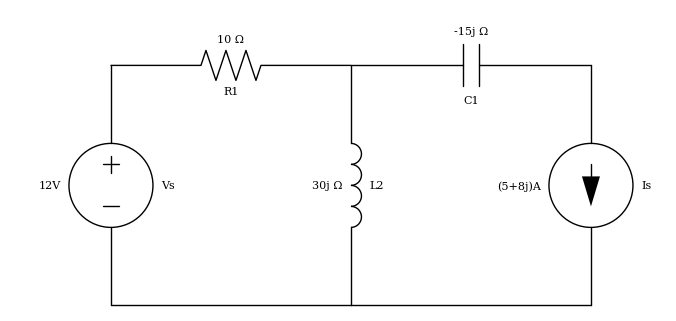

In [20]:
circuito.draw()  # Desenha o circuito sem mostrar as correntes


## Passo 5: Resolver o Circuito

Para calcular as tensões nos nós, usamos `resolver_circuito`, que monta a matriz de condutância e resolve as equações associadas.



In [21]:

V = circuito.solve_circuit()
print("Tensões nos nós:", V)

Tensões nos nós: [   0.   +0.j   -130.2  -8.4j    12.   +0.j    -10.2 -83.4j
    0.   +0.j      0.   +0.j     -2.22 -8.34j   -5.   -8.j
   -2.22 -8.34j]


## Passo 6: Exibir as Correntes nos Componentes

Após resolver o circuito, usamos `draw_with_currents` para desenhar o circuito mostrando as correntes em cada componente. Podemos especificar uma lista de rótulos para mostrar correntes específicas ou deixar o padrão para exibir todas.


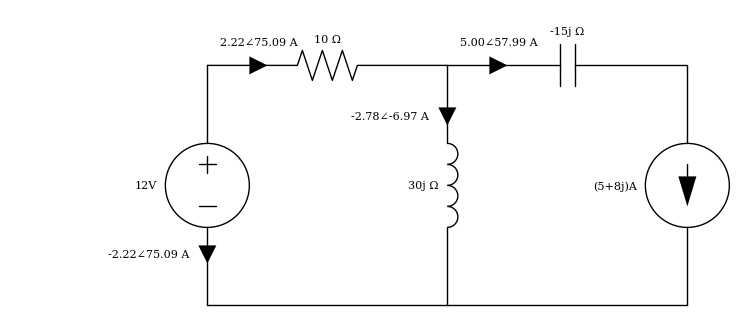

In [22]:
circuito.draw_with_currents()  # Desenha o circuito com correntes indicadas nos componentes